In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

First, we import sympy, numpy, matplotlib,and ipython.display libraries; and, initiate latex printing.

In [2]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
init_printing()

We want to optimize the acceleration at launch of the rocket design shown below.

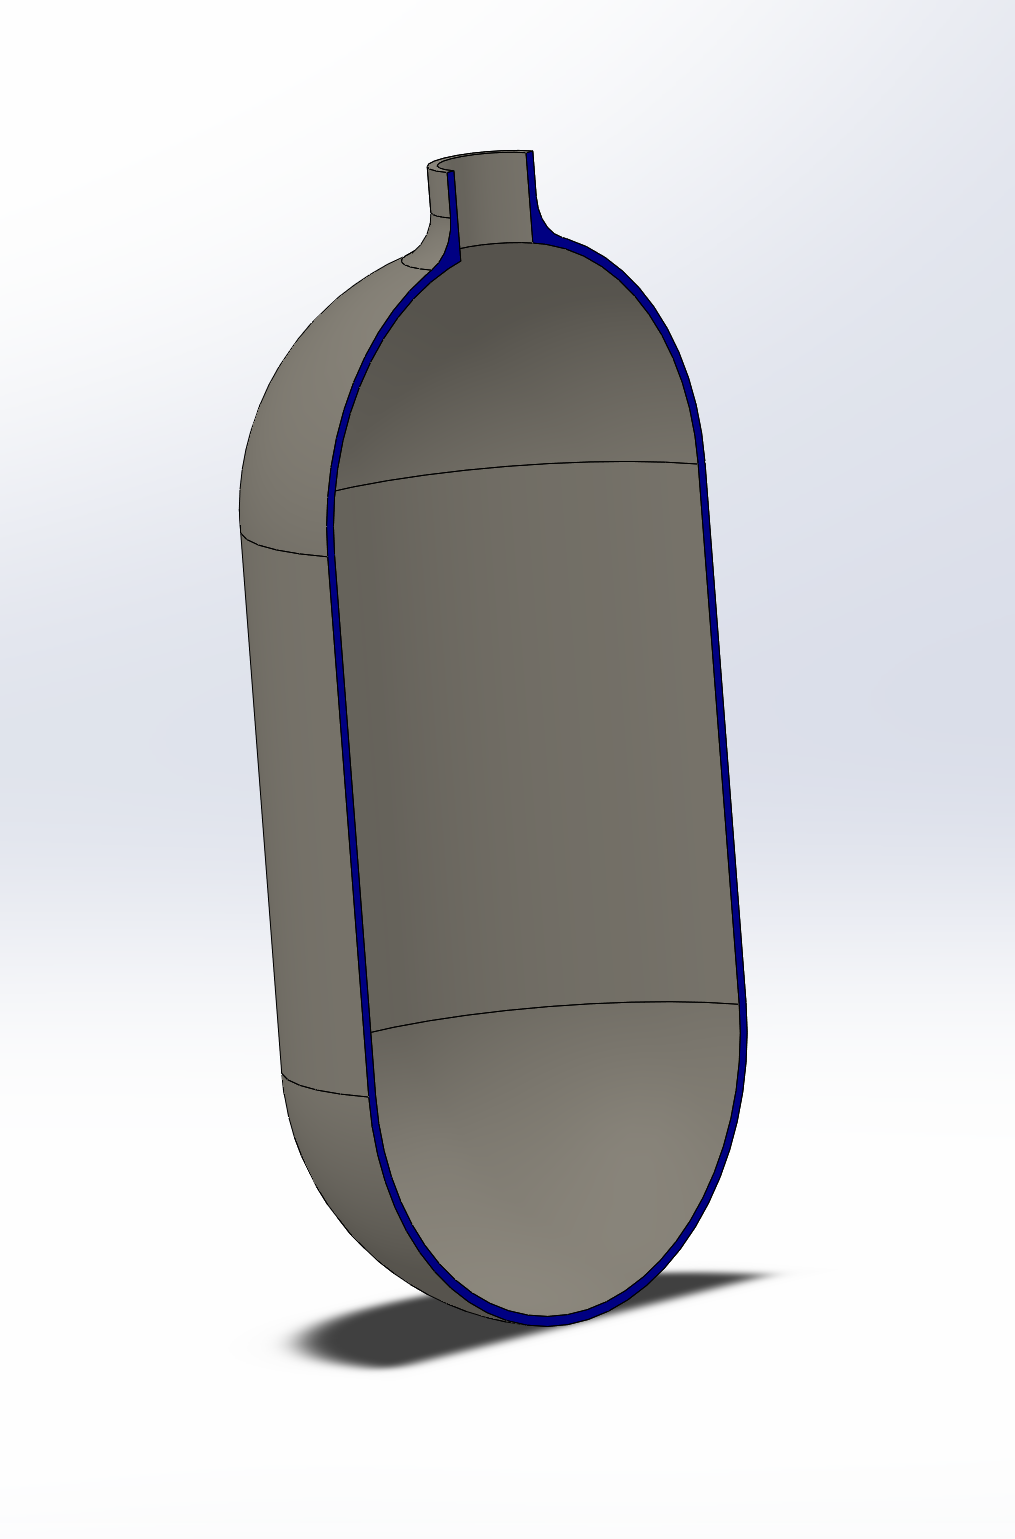

In [3]:
Image(filename='SLDWORKS_lJ3xjb2x4o.png')

Rocket design with cross section.

We want the maximum possible acceleration, **a** to be achieved by our rocket. In order to do this we are optimizing the rocket Equation shown below. This equation came from https://www.grc.nasa.gov/WWW/K-12/rocket/rktslaunch.html and describes the acceleration of a pressurized rocket based on variables: $P_{i}$-internal pressure,$P_{atm}$-external pressure, **a**-acceleration, **g**-gravitational acceleration, **A**-cross sectional area, **t**-time, **W**-weight. 

We initiate these symbols and establish a symbolic relationship for the acceleration, **a**.

In [4]:
Pi,po,a,g,A,t,W,ro=symbols('P_i,P_atm,a,g,A,t,W,r_o')
a = g*(((Pi-po)*A)/W-1)

The expression for **a** is given as $a=${{a}}

This equation currently does not satisfy the candidate design problem project requirement for as is. There are only 3 design variables when the project requires there to be 4. This can be fixed by substituting in an expression for **A**.

In [5]:
r=symbols('r')
A1 = pi*r**2

a = a.subs(A,A1)

The equation becomes $a=${{a}}

This objective equation also does not meet the minimum criteria for the design candidate problem of at least 4 design variables. The weight however is a function of the designs volume. In order to meet the criteria for minimum design variables, we add an expression for volume and substitute it into the candidate design problem with the followiung additional design variables: $r_{i}$ - inner radius, $r_{o}$ - outer radius, and **h** - cylinder height. 

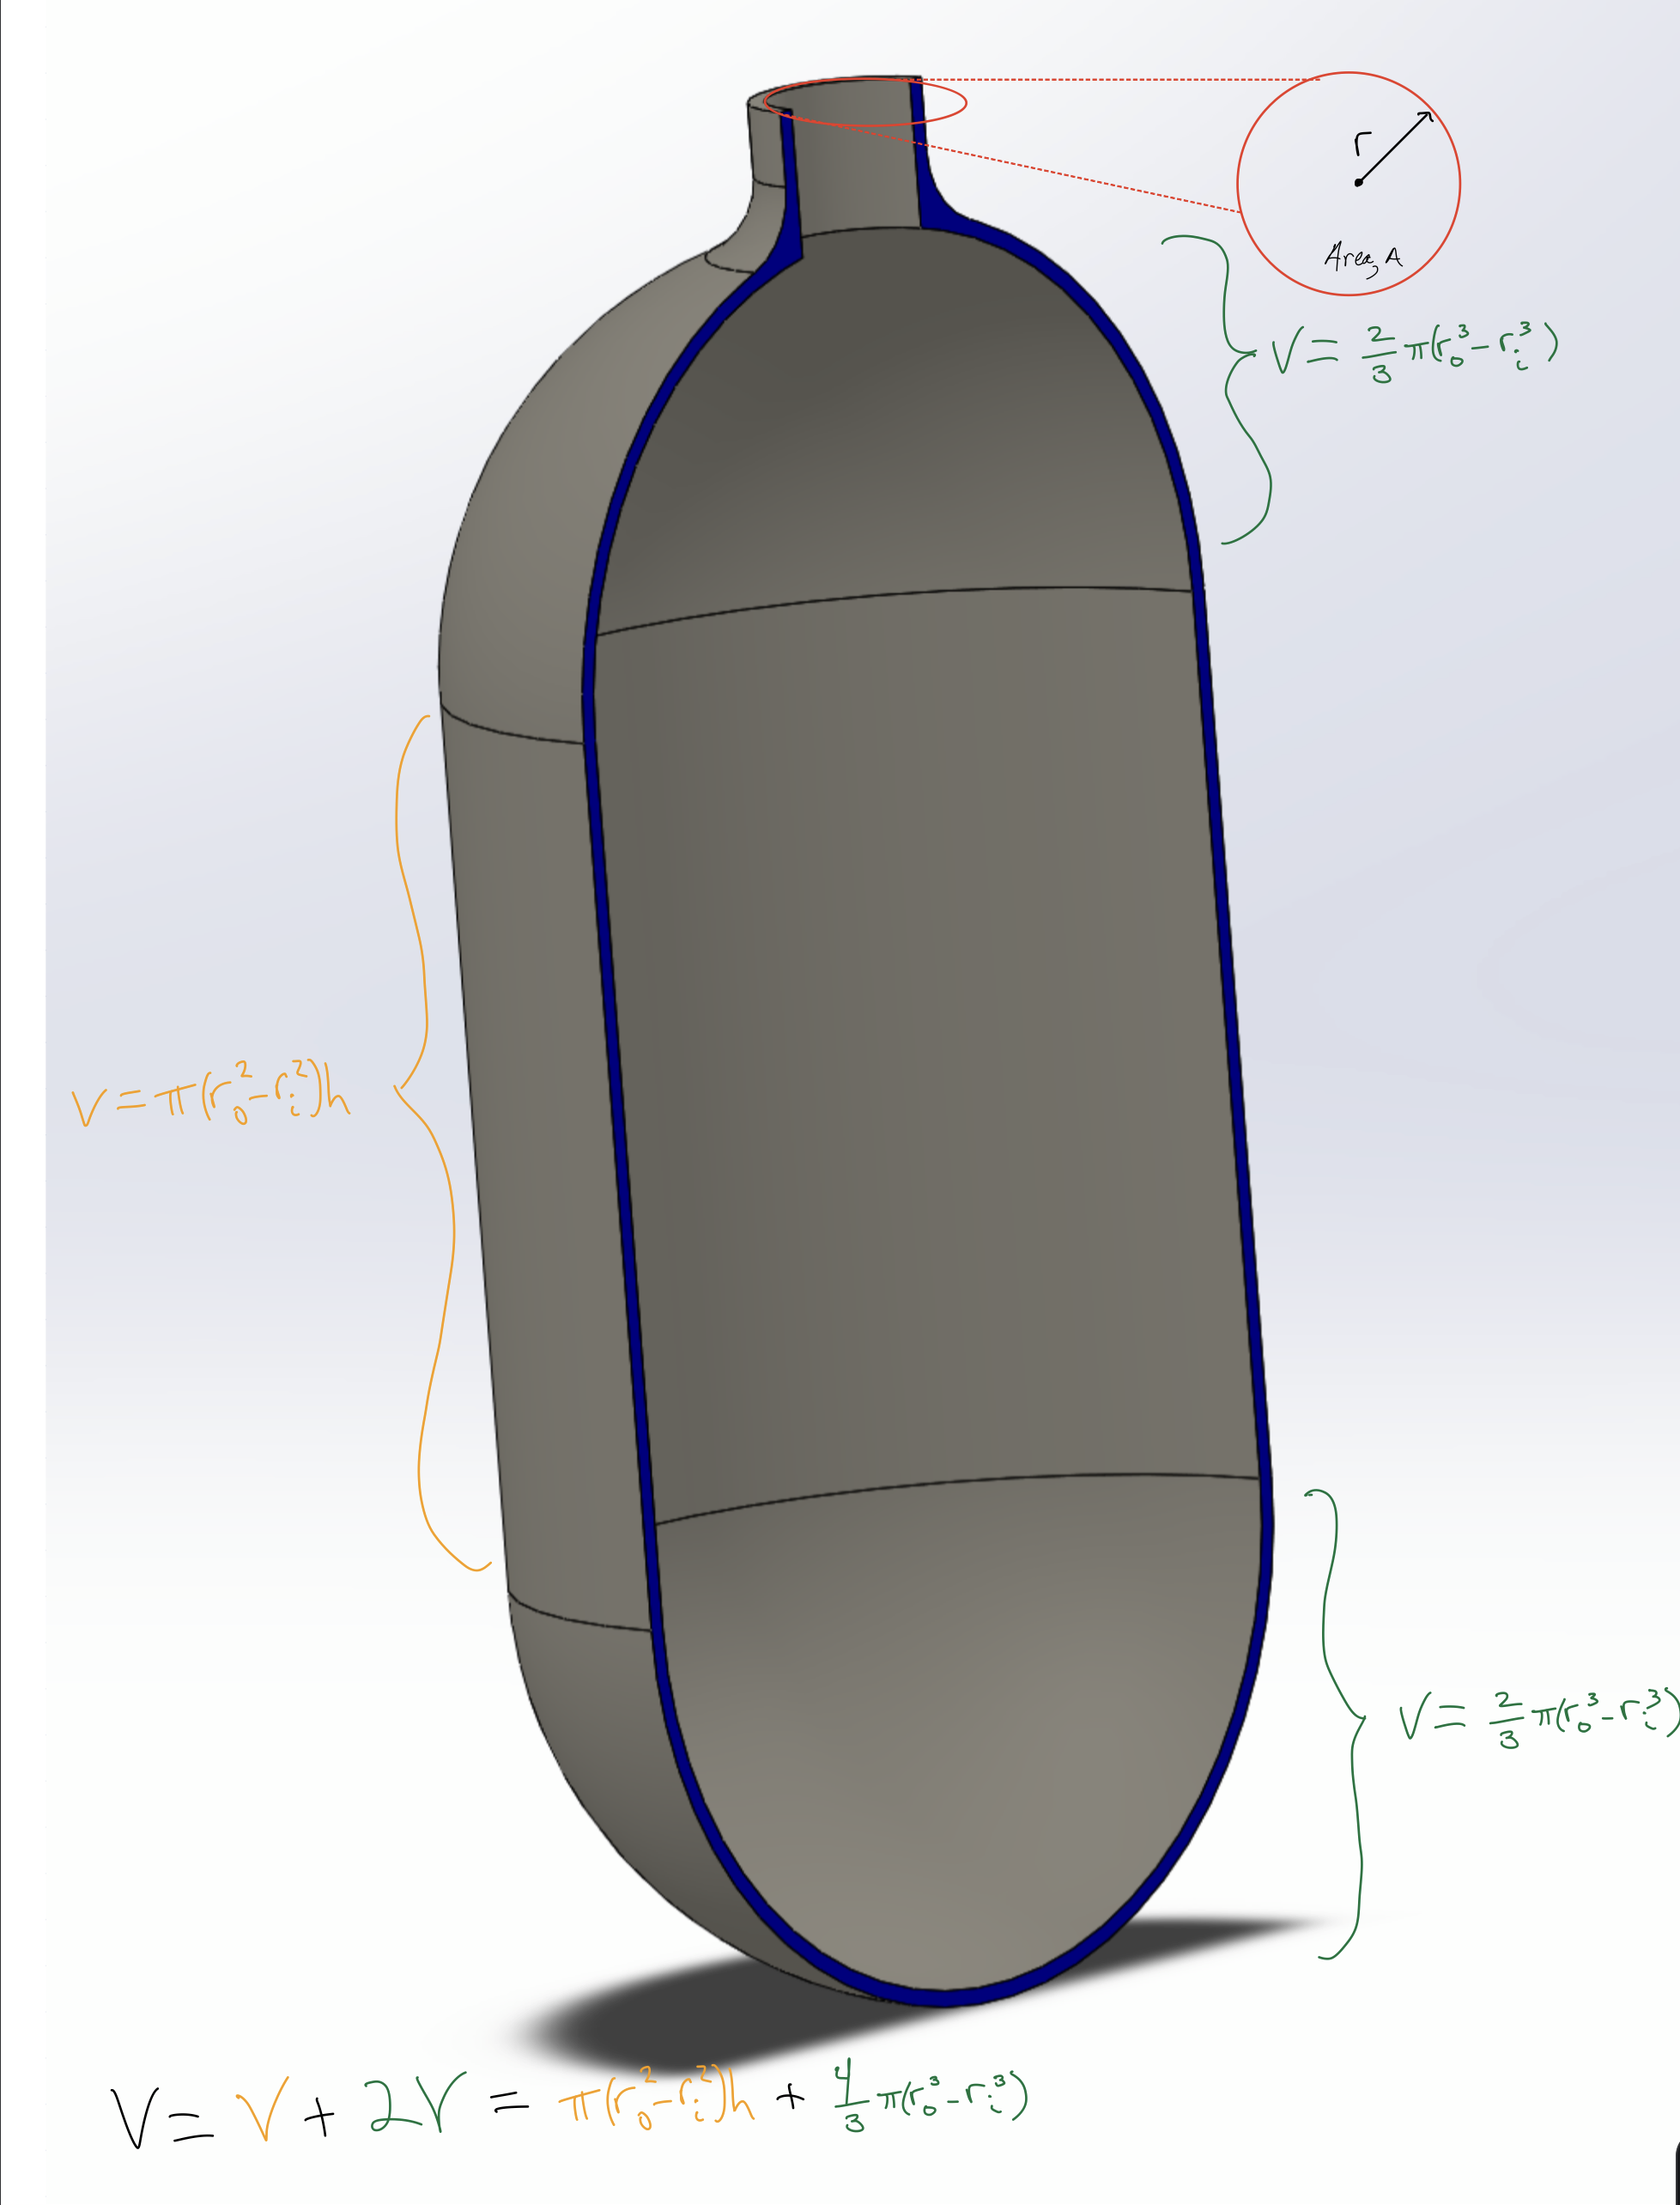

In [6]:
Image(filename='20201106_055134491_iOS.png')

In [7]:
ri,h,V,rho,w1=symbols('r_i, h,V,rho,w1')
V = pi*(ro**2-ri**2)*h+(4/3)*pi*(ro**3-ri**3)

Now we need a function for W to sub in. We establish W = $\rho Vg$. Where **$\rho$** is the density and $V$ is the Volume. We sub in our expression for volume.

In [8]:
w1 = rho*V*g

Now that we have a new expression for W, where w={{w1}} we sub it into our candidate design problem.

In [9]:
a = a.subs(W,w1)

The new candidate objective problem becomes $a=${{a}}

Now, we want to change then design variables to the form:


<font size=24>
$x_{1}$ - radius of exit throat <br>
$x_{2}$ - inner radius<br>
$x_{3}$ - outer radius<br>
$x_{4}$ - height of midsection<br>
$x_{5}$ - internal pressure<br>
</font>

We establish these variables symbolically and make these subsitutions.

In [10]:
x1,x2,x3,x4,x5=symbols('x_1,x_2,x_3,x_4,x_5')
a = a.subs(r,x1)
a = a.subs(ri,x2)
a = a.subs(ro,x3)
a = a.subs(h,x4)
a = a.subs(Pi,x5)
a=-a

Our candidate objective function becomes $a=${{a}}

This objective function meets the candidate criteria. Now we begin to define objective function constraints. The value of the internal pressure cannot exceed the critical pressure $P_{cr}$ this imposes $g_{1}$ : $P_{cr}$-$P_{i} <= 0$ as a constraint. The value of the thickness of the vessel should not be below **2mm** this allows for the constraint: $g_{2}$ : $r_{o}$-$r_{i}$-$.002{m} <= 0$. The outer radius cannot be greater than 200mm due to the 3D printer bed size. This implies constraint g3: $r_{o}$-$.200{m}<=0$

We establish these constraints programattically.


In [11]:
g1,g2,g3,Pcr,h,rext,ri=symbols('g_1,g_2,g_3,P_critical,height_midsection,radius_exit,r_i')
#pcr is defined as 2x atm for a quicker study
Pcr=2*101325
g1 = Pcr-Pi <= 0
g2 = ri-ro-.002 <= 0
g3 = ro-.150 <= 0
g4 = h-.300<=0
g5 = rext-.025<=0
g6 = ri-.095<=0

This gives us constraints:<br><br>
$g_1$: {{g1}}<br>
$g_2$: {{g2}}<br>
$g_3$: {{g3}}<br>
$g_4$: {{g4}}<br>
$g_5$: {{g5}}<br>
$g_6$: {{g6}}<br>

We want these in terms of variables $x_{1}, x_{2}, x_{3}, x_{4},$ and $x_{5}$. Subbing in the values **$x_{5}=P_{i}$** - internal pressure, **$x_{2}=r_{i}$** - inner radius, and $x_{3}=r_{o}$ - outer radius into $g_{1},  g_{2},  g_{3}$.

In [12]:
g1 = g1.subs(Pi,x5)
g2 = g2.subs(ri,x2)
g2 = g2.subs(ro,x3)
g3 = g3.subs(ro,x3)
g4 = g4.subs(h,x4)
g5 = g5.subs(rext,x1)
g6 = g6.subs(ri,x2)

The new constraint equations are.<br><br>
$g_1$: {{g1}}<br>
$g_2$: {{g2}}<br>
$g_3$: {{g3}}<br>
$g_4$: {{g4}}<br>
$g_5$: {{g5}}<br>
$g_6$: {{g6}}<br><br>

Now, we need to determine an alternative form of the objective function for the study which gives non-monotonic objective function behaviors. This can be done simply by multiplying sinusoidal functions sine and cosine to the objective function. We do so below.

In [13]:
x6,x7=symbols("x_6,x_7")
a=a*cos(x6)*sin(x7)

The objective function becomes $a=${{a}}

Now, we want to conduct 1D parameter studies. Using the function param_study1D we study parameters 1, 2, 3, 4, and 5. To do this we import some libararies for math, interactive widgets, and plotting. We also establish 3 functions:  <br><br>
fun_eval(xi): This function evaluates the objective function with vector xi of $x_{1},x_{2},x_{3},x_{4},x_{5}$ values.<br>
study_function(xdata): This function creates vector of y axis data iteratively.<br>
param_study1D: This function takes input parameter and upper and lower graph bounds and outputs paramter study.<br>

In [14]:
from ipywidgets import interactive,widgets

In [15]:
def fun_eval(xi):
    #from numpy import Matrix
    import math
    rho = 1240*.2#kg/m^3
    g=   9.81 #m/s^2
    Patm=101325#N/m^2
    #print('xi:\n'+str(xi))
    yi=(-1+(((math.pi*xi[0]**2)*(-Patm+xi[4])))/(g*rho*(math.cos(xi[0])*xi[3]*(-1.01*xi[1]**2+xi[2]**2))+(4/3)*math.pi*(-1.01*xi[1]**3+xi[2]**3)))*cos(xi[5])*sin(xi[6])
    return -yi/9.81#dividing by 9.81 reduces answer output to g force acceleration

In [16]:
def study_function(xdata):
    from numpy import append
    sn,nd= xdata.shape
    ydata=[]
    for i in range(0,sn):
        xi=xdata[i,:]
        yi=fun_eval(xi)
        ydata=append(ydata,yi)
    return ydata

In [17]:
def param_study1D(parameter,LB,UB):
    from numpy import ones,arange,transpose,array,linspace
    from matplotlib.pyplot import subplots,plot,show,xlabel,ylabel,legend,title,tick_params,grid,ylim,xlim,xticks,yticks
    %matplotlib inline
    fig, ax = subplots()
    sn=150
    xdata=array(ones([sn,7]))
    
    xdata[:,0]=xdata[:,0]*.02
    xdata[:,1]=xdata[:,1]*.095
    xdata[:,2]=xdata[:,2]*.115
    xdata[:,3]=xdata[:,3]*.250
    xdata[:,4]=xdata[:,4]*101325*2
    xdata[:,5]=xdata[:,5]*linspace(0,2,sn)#this design variable is artificial and introduces non monotonic (cosine) behaviors
    xdata[:,6]=xdata[:,6]*linspace(0,2,sn)
    #print('xdata:\n'+str(xdata))
    xs=transpose([array(linspace(LB,UB,sn))])
    xdata[:,parameter-1]= xs[:,0]
    #print('xdata:\n'+str(xdata))
    ydata=study_function(xdata)
    #print('ydata:\n'+str(ydata))
    plot(xs,ydata,'b-',linewidth=4)
    #title('parameter %i' %parameter_to_study)
    xlabel('Value of Parameter '+str(parameter),fontsize=24)
    ylabel('Objective Function Value',fontsize=24)
    title(' --- Parameter '+str(parameter)+' study ---',fontsize=24)
    fig.set_size_inches(18.5,18.5)
    tick_params(labelsize=24,pad=6)
    grid()

We create an interactive plot 1D study with the function param_study1D we have established

In [18]:
interactive(param_study1D,parameter=[1,2,3,4,5],LB=[0.01,.1,.15,.2,.25,.3,.35,.40,.45,.50,.55,.60,.65,.70,.75,.80,.85,.90,.95,1],UB=[.025,.1,.2,.3,.4,.5,.6,.7,.8,.9])

interactive(children=(Dropdown(description='parameter', options=(1, 2, 3, 4, 5), value=1), Dropdown(descriptio…

Now, we want to look at these studies individually.

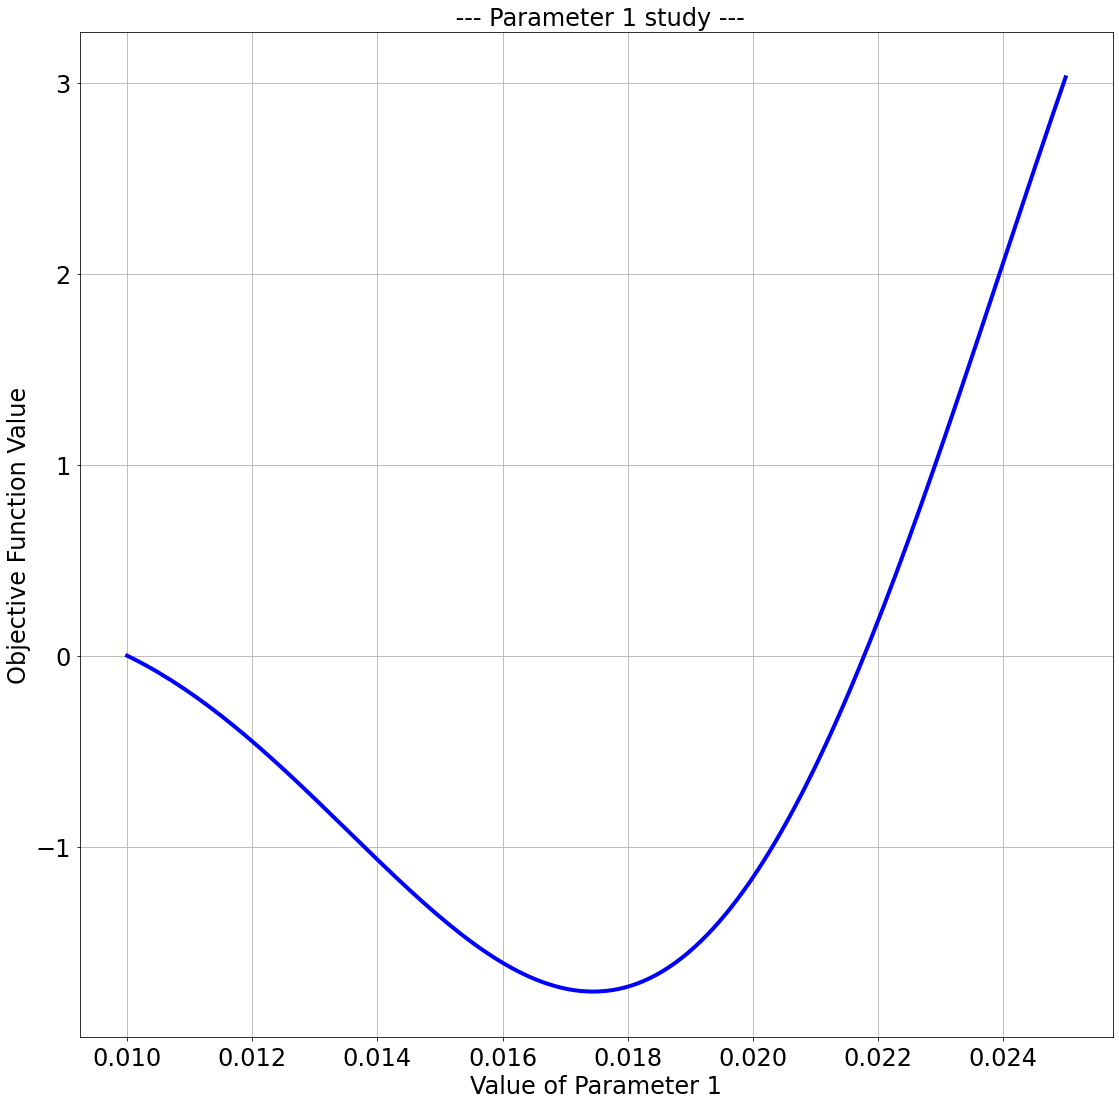

In [19]:
param_study1D(1,.01,.025)

<font size=6>This shows that design parameter $x_{1}$ the radius of the exit throat has an exponential relationship with the objective function value.</font>

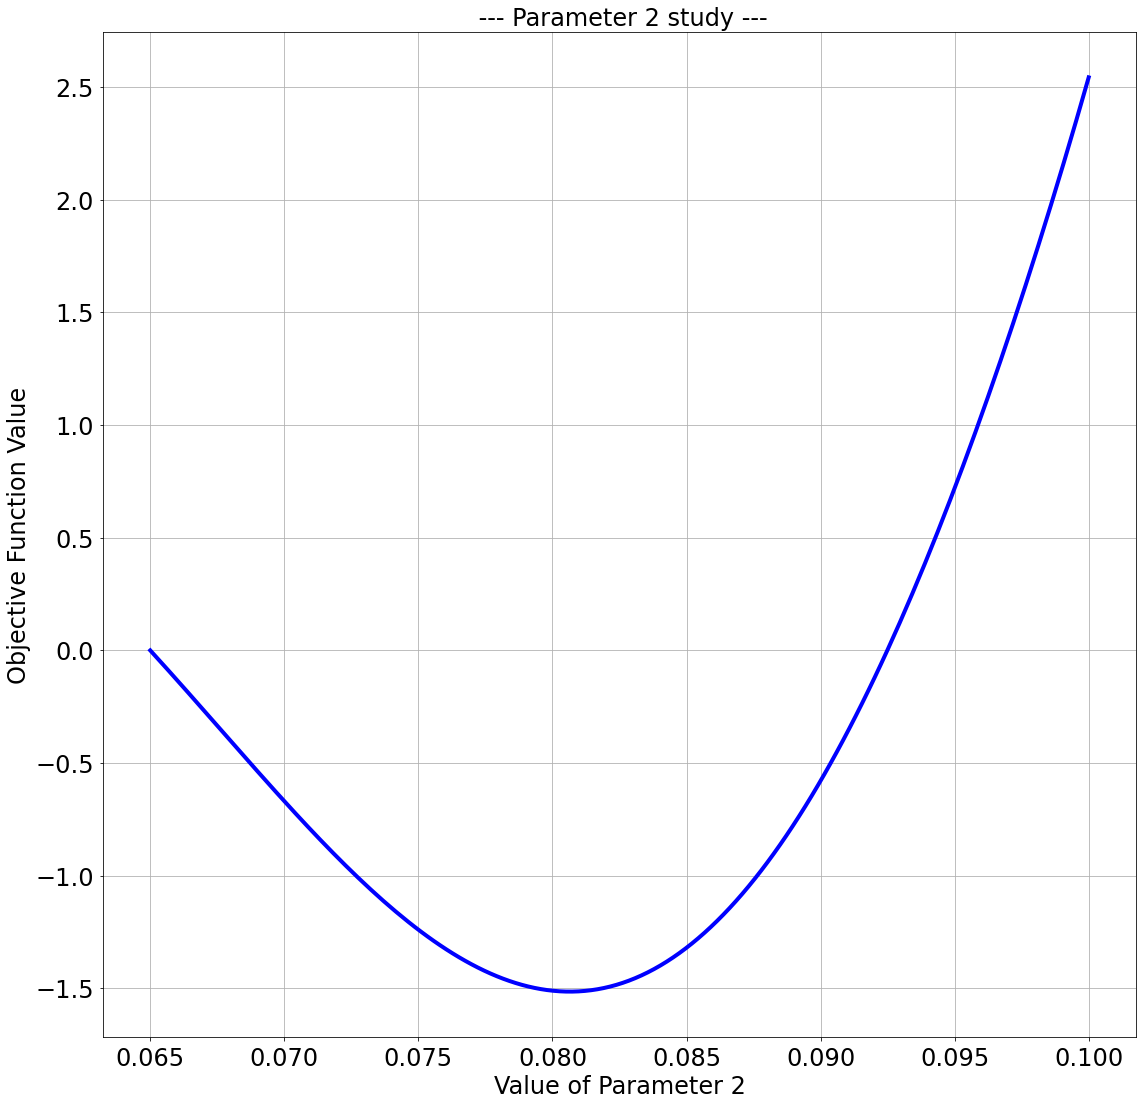

In [20]:
param_study1D(2,0.065,.1)

<font size=6>This shows that design parameter $x_{2}$ the inner radius of the pressure vessel has a hyperbolic relationship with the objective function value.</font>

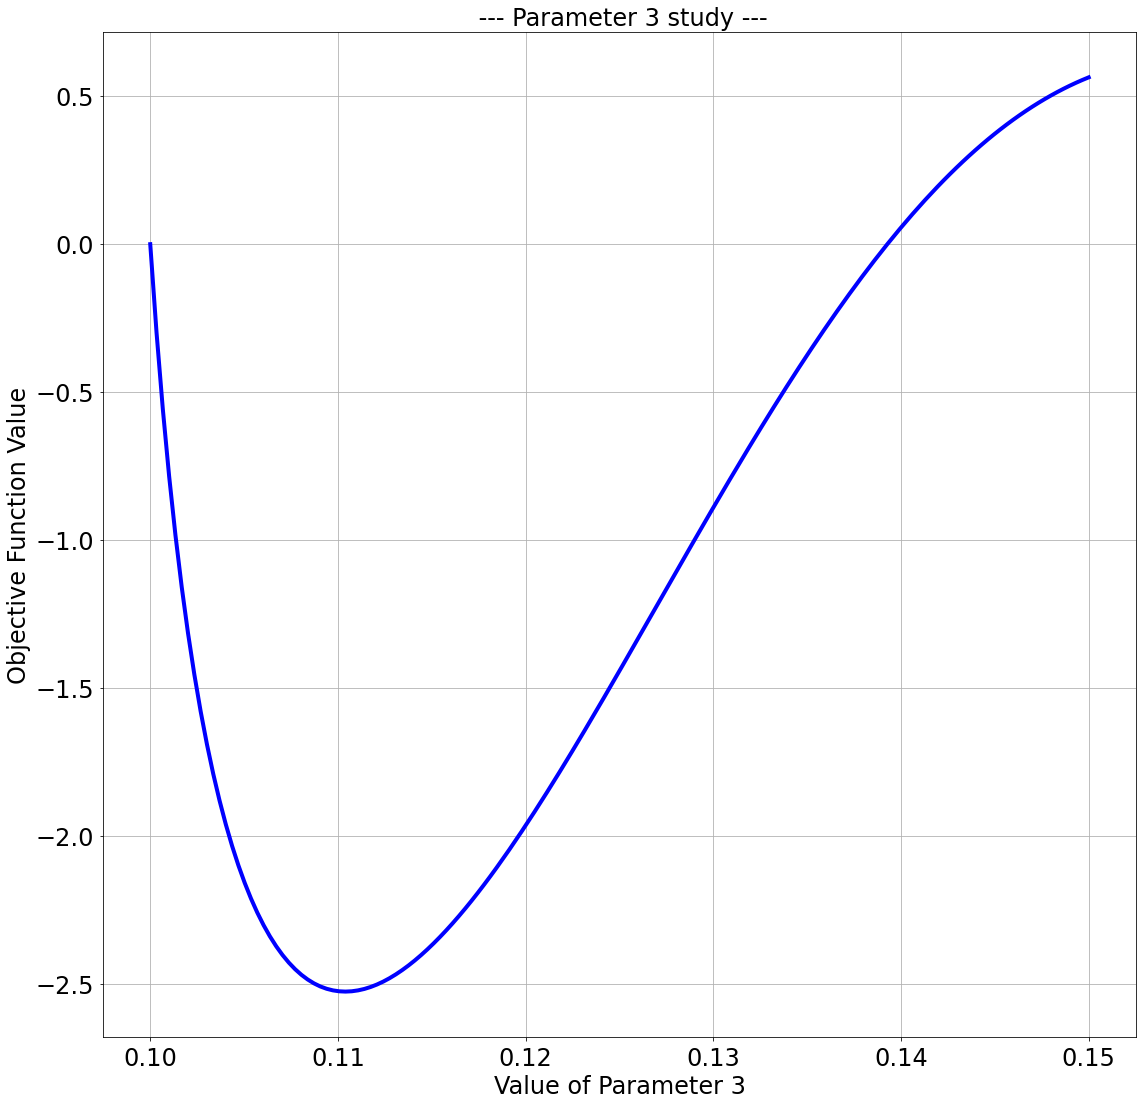

In [21]:
param_study1D(3,.1,.15)

<font size=6>This shows that design parameter $x_{3}$ the outer radius of the pressure vessel has a hyperbolic relationship with the objective function value.</font>

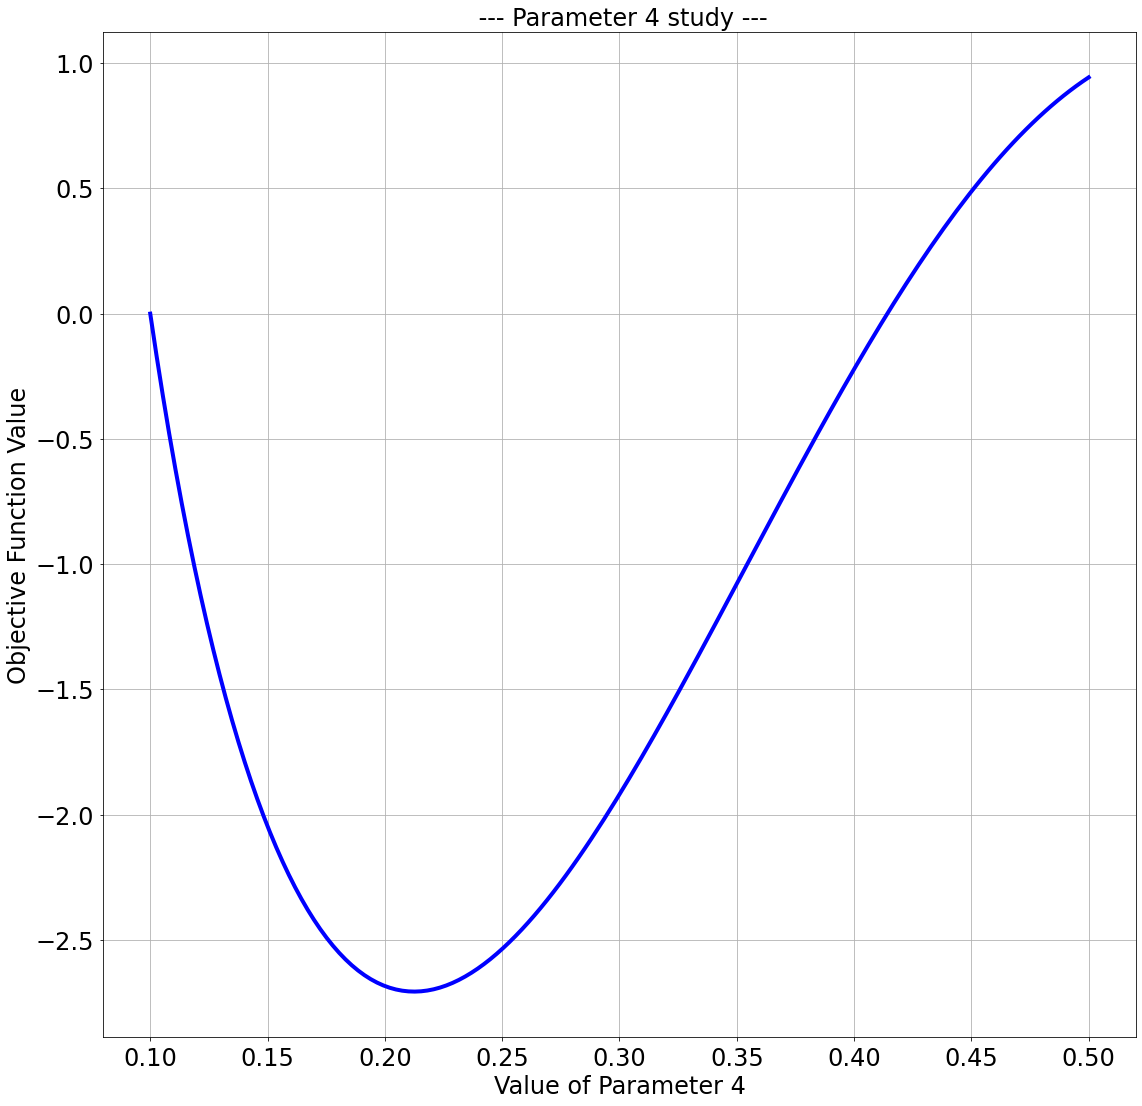

In [22]:
param_study1D(4,.1,.5)

<font size=6>This shows that design parameter $x_{4}$ the height of the midsection of the pressure vessel has a hyperbolic relationship with the objective function value.</font>

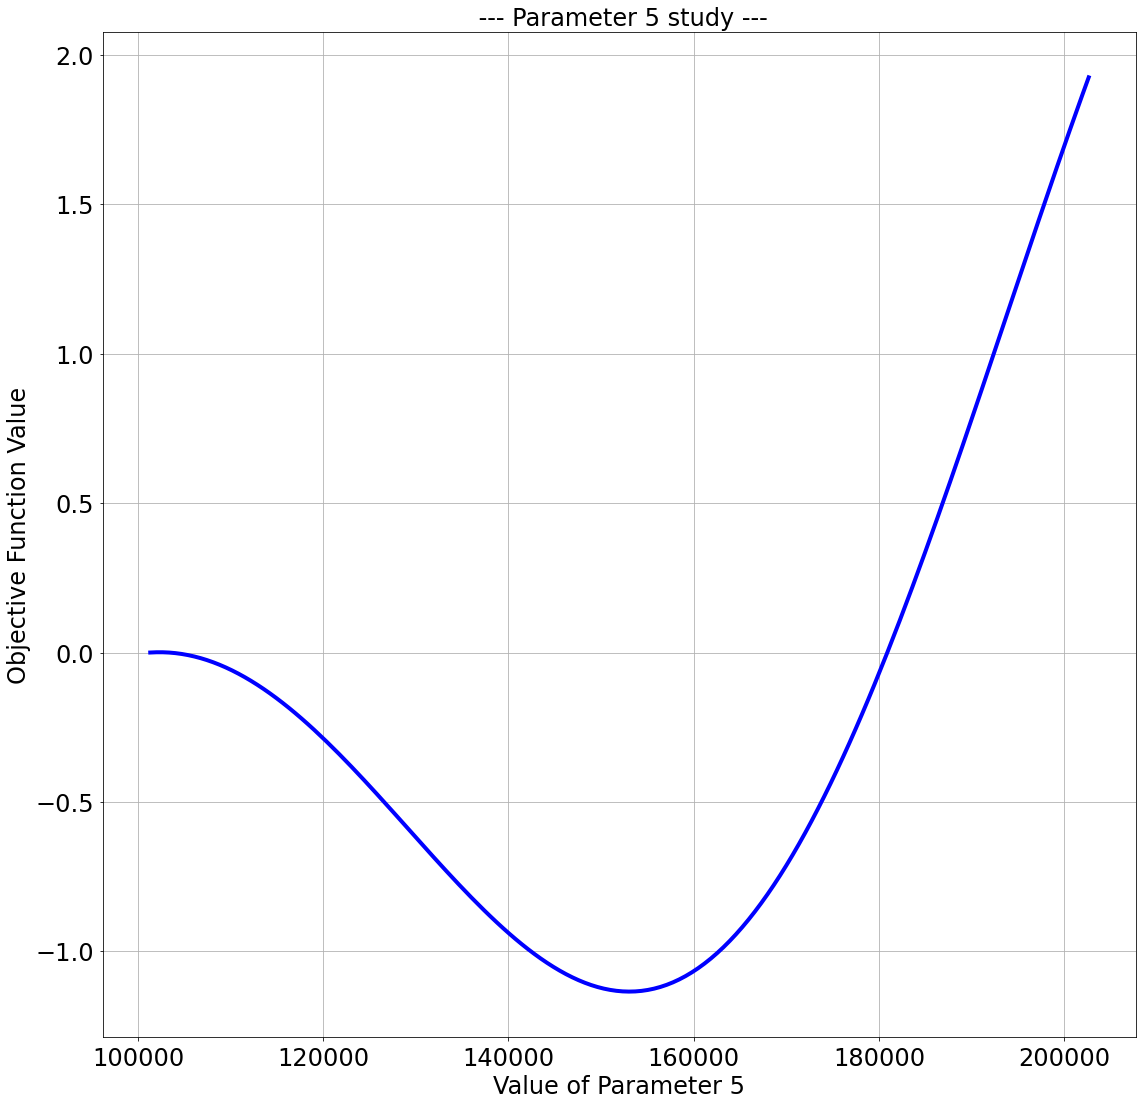

In [23]:
param_study1D(5,101325,202650)

<font size=6>This shows that design parameter $x_{5}$ the internal pressure of the pressure vessel has a linear relationship with the objective function value.</font>

The 1D parameter studies above show that there is a strong need for the functions to be bounded around variables: $x_{2},x_{3},$ and $x_{5}$ due to their position on the bottom of a fraction in then objective function. We could still use to know more about the behavior of the design variables so we continue and establish a basis for studying two design parameters vs the objective function.<br><br>

We establish function: param_study2D(parameter1, parameter2, LB, UB, gridn, angle)<br><br>
this function takes inputs of: the first study paramter, the second study parameter, the function upperbounds, the function lowerbounds, the amount of grid points, and the angle of the output graph.<br>

In [24]:
def param_study2D(parameter1,parameter2,LBp1,UBp1,LBp2,UBp2,gridn,angle):
    
    from numpy import ones,arange,transpose,array,linspace,meshgrid,shape,reshape,zeros
    from matplotlib.pyplot import subplots,plot,show,xlabel,ylabel,legend,title,tick_params,grid,ylim,xlim,xticks,yticks,close,pause
    from mpl_toolkits import mplot3d
    import math
    %matplotlib inline
    xs1=transpose([array(linspace(LBp1,UBp1,gridn))])
    xs2=transpose([array(linspace(LBp2,UBp2,gridn))])
    [xs1,xs2]=meshgrid(xs1,xs2)
    shape=shape(xs1)
    xs1=xs1.flatten('F')
    xs2=xs2.flatten('F')
    sn=len(xs1)
    parameter1=parameter1-1
    parameter2=parameter2-1
    

    xdata=ones([sn,7])*1#integer to right of sn, needs to equal number of design variables in objective function
    #print("xdata:"+str(xdata))
    #print("xdata:"+str(xdata))
    xdata[:,0]=xdata[:,0]*.02
    xdata[:,1]=xdata[:,1]*.095
    xdata[:,2]=xdata[:,2]*.115
    xdata[:,3]=xdata[:,3]*.1750
    xdata[:,4]=xdata[:,4]*101325*2
    xdata[:,5]=xdata[:,5]*linspace(0,2,sn)#this design variable is artificial and introduces non monotonic (cosine) behaviors
    xdata[:,6]=xdata[:,6]*linspace(-2,0,sn)#this design variable is artificial and introduces non monotonic (cosine) behaviors
    xdata[:,parameter1]=xs1
    xdata[:,parameter2]=xs2
    XS1,XS2=meshgrid(xs1,xs2)
#     with np.printoptions(linewidth=250):
#         print("xdata:"+str(xdata))
    #print("xdata:"+str(xdata))
    #print('xs1:\n'+str(xs1))
    ydata=study_function(xdata)
    ydata=ydata.flatten('F')
    ydatamesh,ydatamesh=meshgrid(xs1,xs2)
    close("All")
    fig = plt.figure()
    ax = plt.axes(projection='3d')
#     print("xs1:"+str(xs1))
#     print("xs2:"+str(xs2))
#     print("ydata:"+str(ydata))
   
    #ax.plot_surface(xs1,xs2,ydata)
    #ax.plot_trisurf(xs1,xs2,ydata,cmap='gist_heat')
    ax.scatter(xs1,xs2,ydata,c=ydata,linewidth=10,cmap='jet')
    fig.set_size_inches(18.5,18.5)
    xlabel('Study Parameter: x'+str(parameter1+1),fontsize=24,labelpad=25)
    ylabel('Study Parameter: x'+str(parameter2+1),fontsize=24,labelpad=25)
    title(' --- Parameter '+str(parameter1+1)+' & '+str(parameter2+1)+' study ---',fontsize=24)
    ax.set_zlabel('Objective Function Value',fontsize=24,labelpad=20)    
    ax.view_init(30, angle)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlim3d(LBp1, UBp1)
    ax.set_ylim3d(LBp2,UBp2)
    #ax.set_zlim3d(0,1000)

In [25]:
#interactive(param_study2D,parameter1=[1,2,3,4,5],parameter2=[2,1,3,4,5],LBp1=[0.01,.08,.09,.1,.11,.12,.13,.14,.15,.25,.4,.5,.75,1,10,100,1000,10000,100000,10000000],UBp1=[1,.1,.11,.12,.13,.14,.15,.25,.3,.5,.6,.75,1,1.1,1.5,100,1000,10000,100000,1000000],
 #           LBp2=[0.01,.08,.09,.1,.11,.12,.13,.14,.15,.25,.4,.5,.75,1,10,100,1000,10000,100000,10000000],UBp2=[1,.1,.11,.12,.13,.14,.15,.25,.3,.5,.6,.75,1,1.1,1.5,100,1000,10000,100000,1000000],gridn=[10,15,20,25,30,40,50,60,70,80,90,100],angle=widgets.IntSlider(min=0, max=360, step=15, value=255))

Now that we have established a 2D study interactive widget and function. We comment these lines and move on. We look at the indivdual 2D studies in more details.

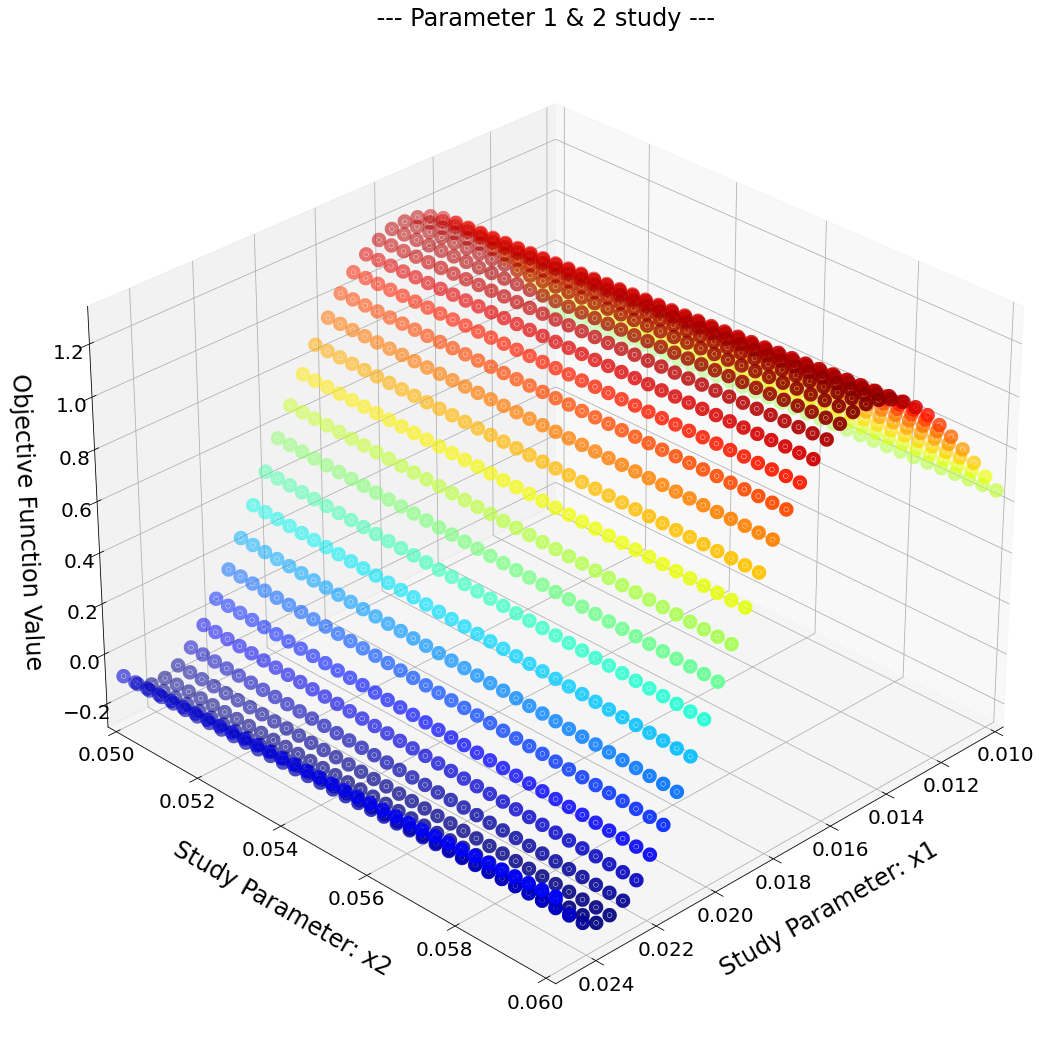

In [26]:
param_study2D(1,2,0.01,.025,.05,.06,35,45)

<font size=6>This 2d design study shows that there is a hyperbolic relationship between the radius of the exit throat and the inner radius of the pressure vessel as design variable $x_{2}$ changes.</font>

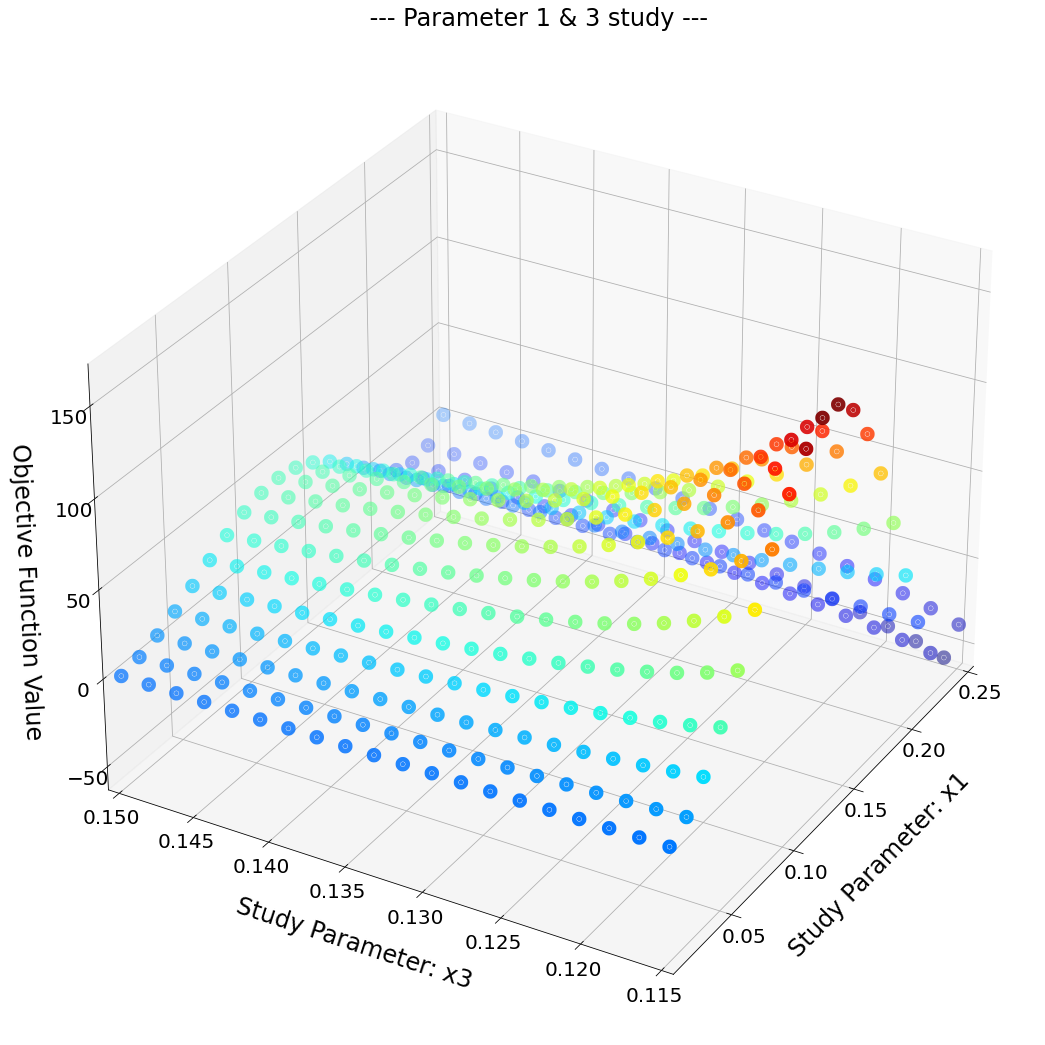

In [27]:
param_study2D(1,3,0.01,.25,.115,.15,20,210)

<font size=6>This 2d design study shows that there is a hyperbolic relationship between the radius of the exit throat and the objective function as design variable $x_{3}$ changes.</font>

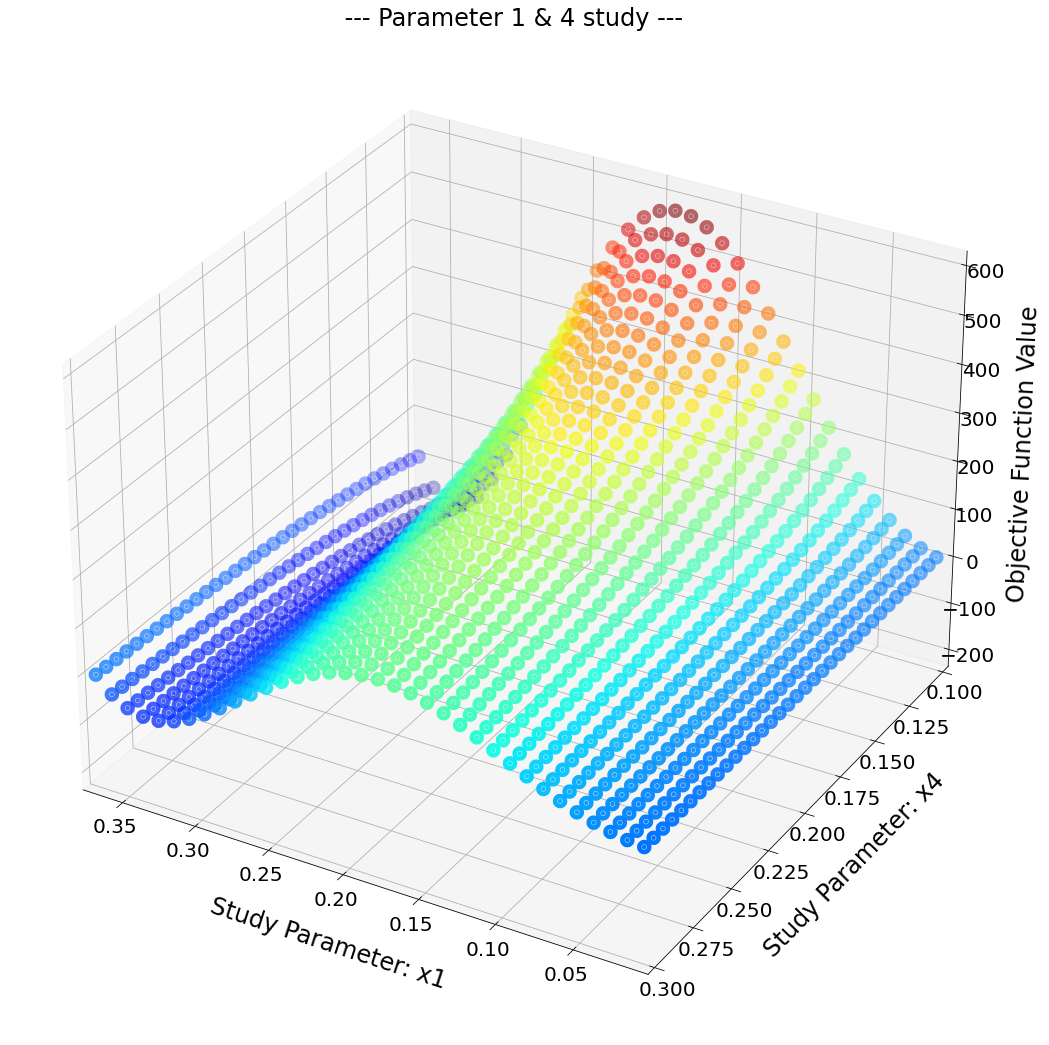

In [28]:
param_study2D(1,4,0.01,.37,0.1,.3,35,120)

<font size=6>This 2d design study shows that there is an exponential relationship between the objective function and design variables $x_{4}$ and $x_{4}$. $x_{4}$ can be seen to approach infinity faster and thus has a stronger exponential relationship. </font>

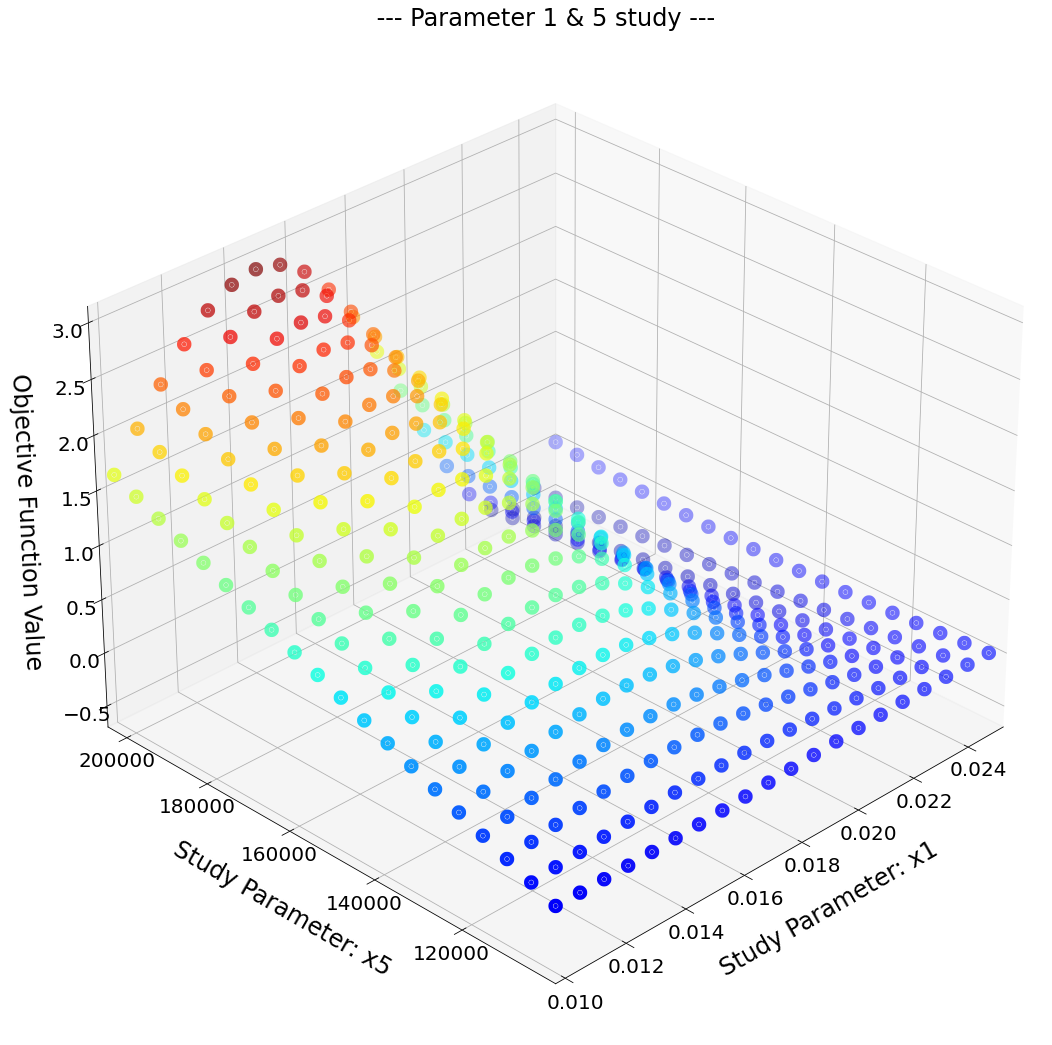

In [29]:
param_study2D(1,5,0.01,.025,101325,101325*2,20,225)

<font size=6>This 2d design study shows that there is an exponential relationship between the objective function and design variable $x_{1}$ and a linear relatinship between the objective function and design variable $x_{5}$.</font>

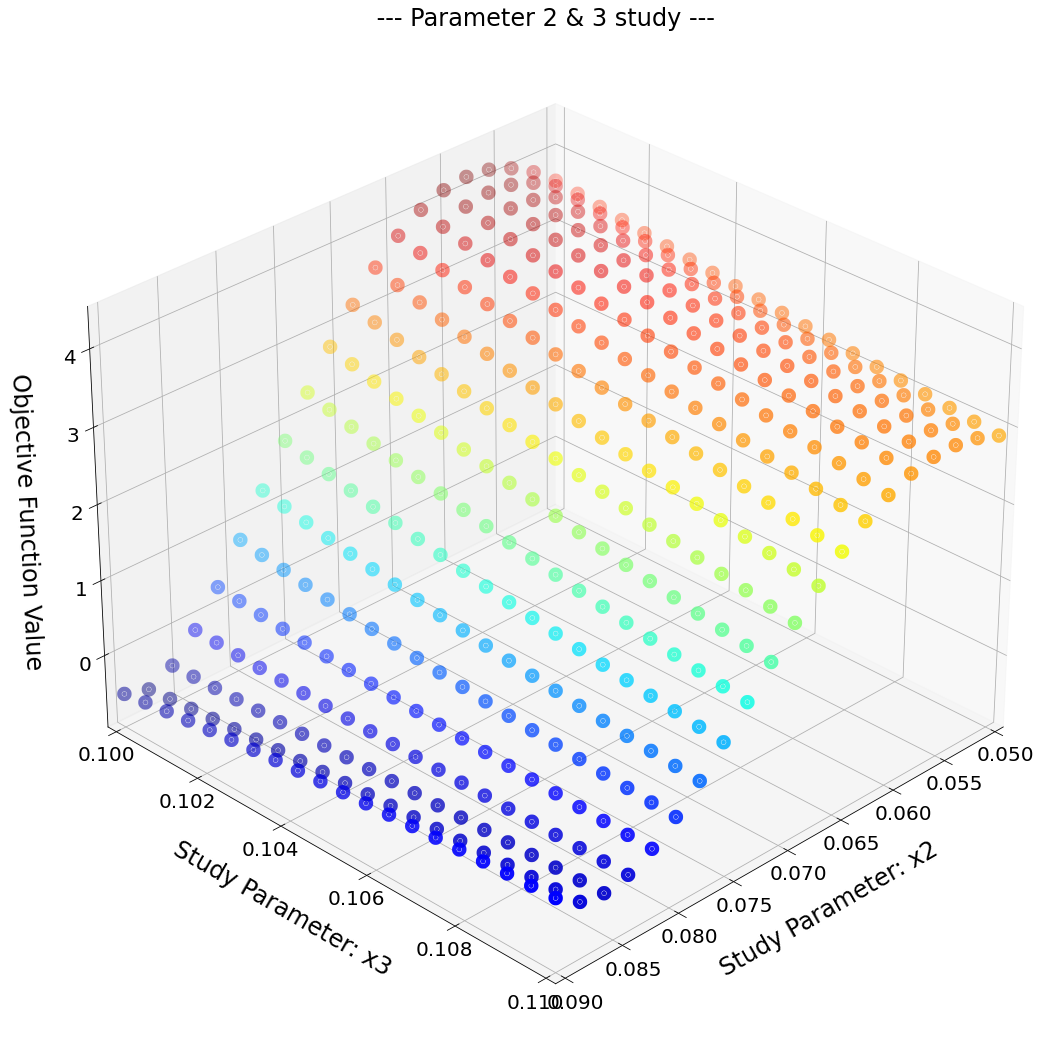

In [30]:
param_study2D(2,3,0.05,.09,.1,.11,20,45)

<font size=6>This 2D design study shows that there is a point where design variables $x_{2}$ and $x_{3}$ approach positive and negative infinity. This is the location where the design approaches 0 pressure vessel thickness.</font>

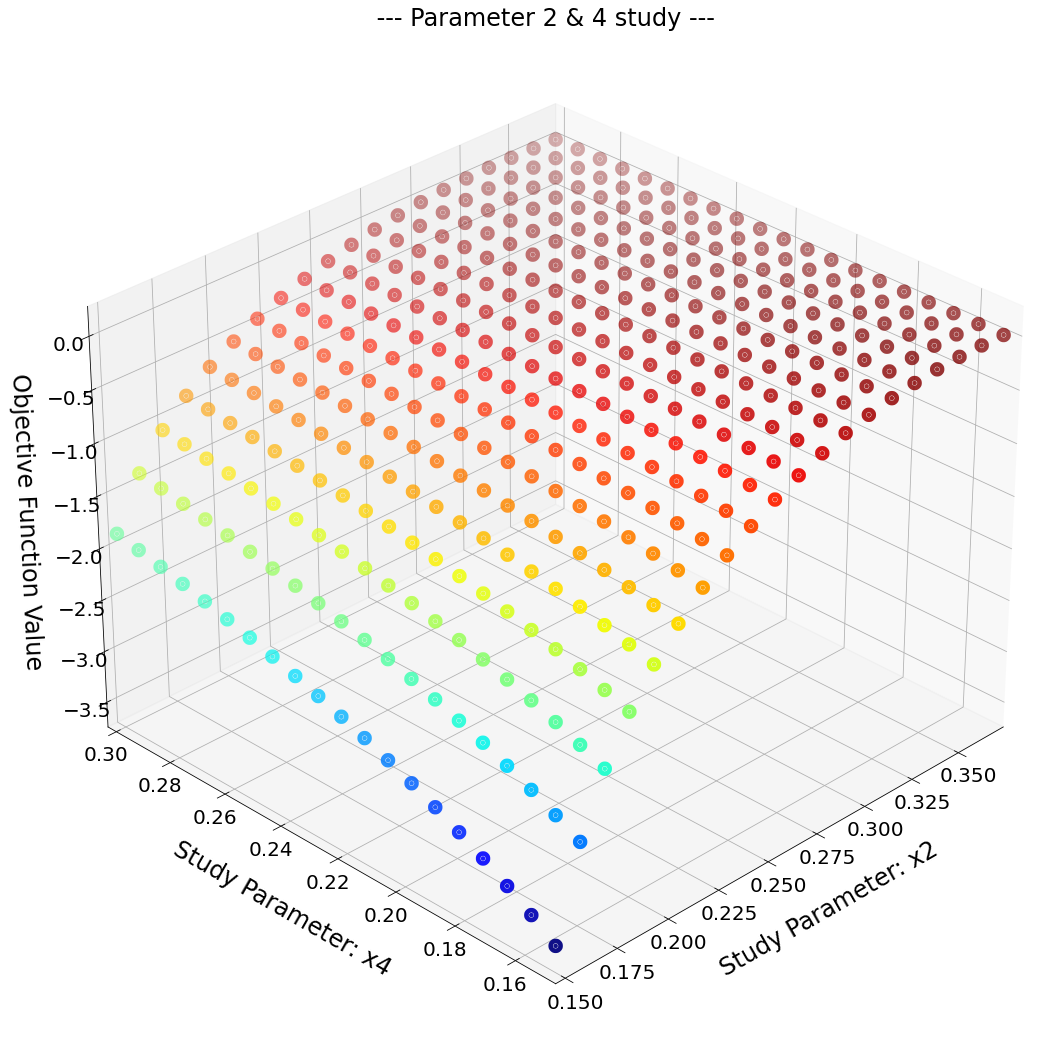

In [31]:
param_study2D(2,4,0.15,.37,0.15,.3,20,225)

<font size=6>This 2D design study shows that there is a point where design variables $x_{2}$ and $x_{4}$ approach positive and negative infinity.</font>

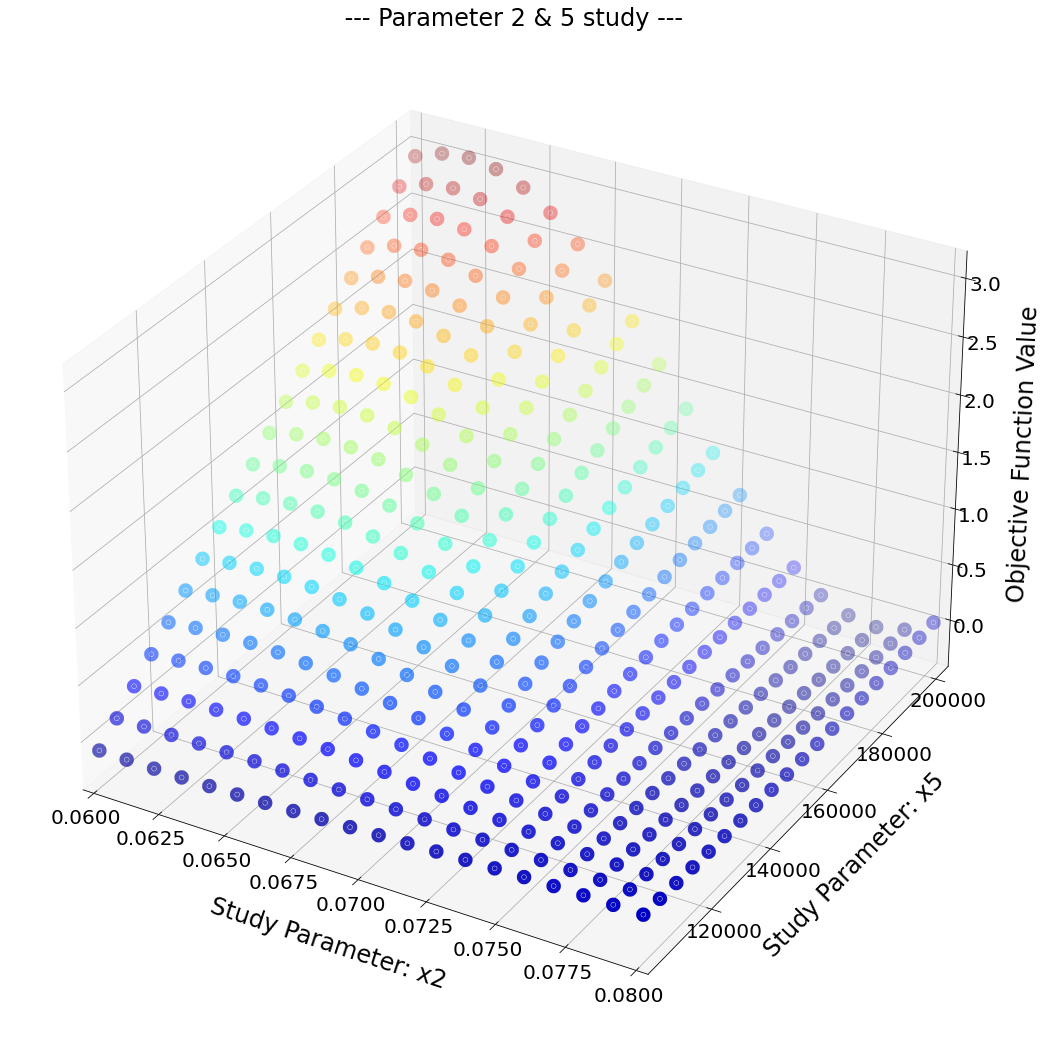

In [32]:
param_study2D(2,5,.06,.08,101325,101325*2,20,300)

<font size=6> This 2D design study shows that design prameter $x_{2}$ causes the objective function value to approach positive and negative infinity around the value of .5. This is due to the fact that the thickness of the pressure vessel approaches 0 at this value in the study.</font>

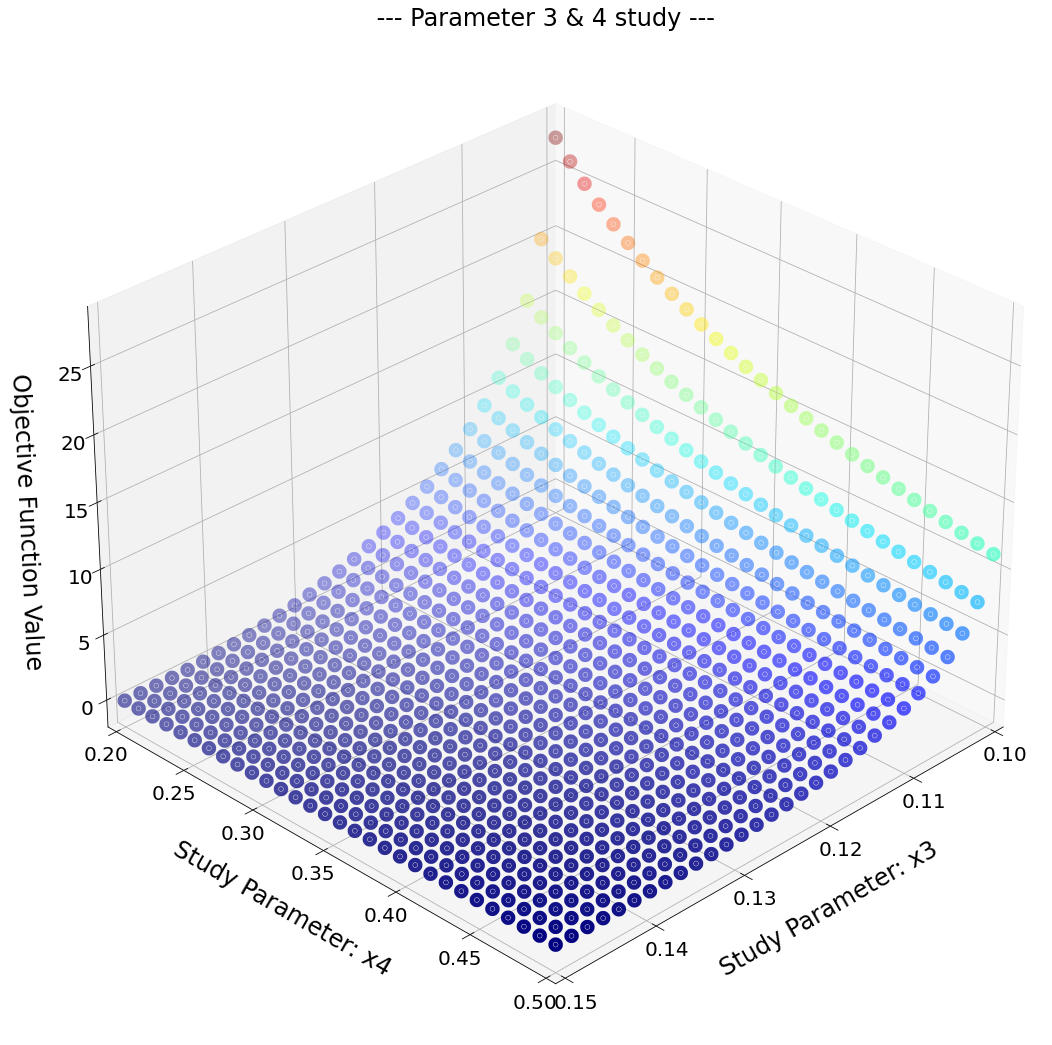

In [33]:
param_study2D(3,4,.1,.15,.2,.5,30,45)

<font size=6> This 2D design study shows that there is a point where the value of the objective function approaches infinity and negative infinity when we vary design variables $x_{3}$ and $x_{4}$.</font>

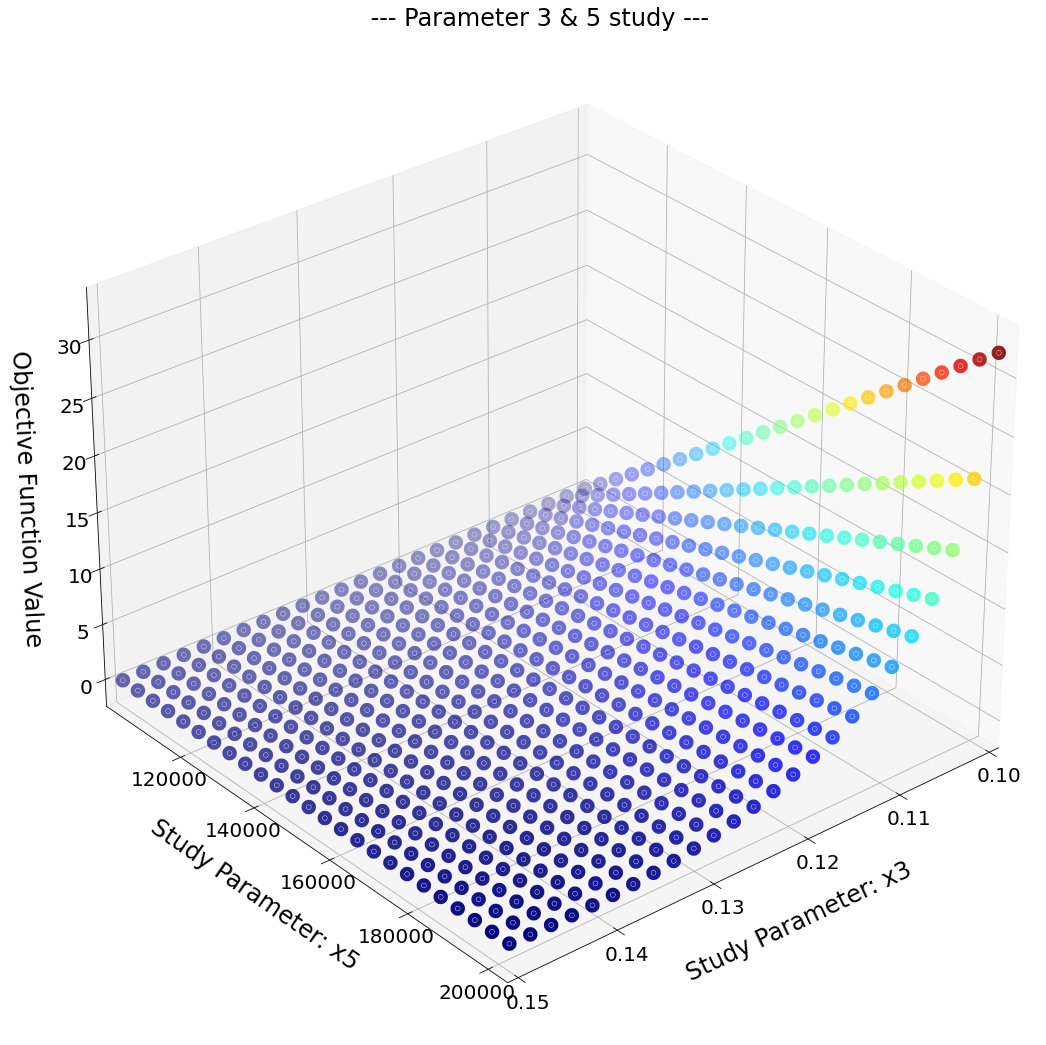

In [34]:
param_study2D(3,5,.1,.15,101325,101325*2,25,50)

<font size=6> This 2D design study shows that there is a point where the value of the objective function approaches infinity and negative infinity when we vary design variable $x_{3}$.</font>

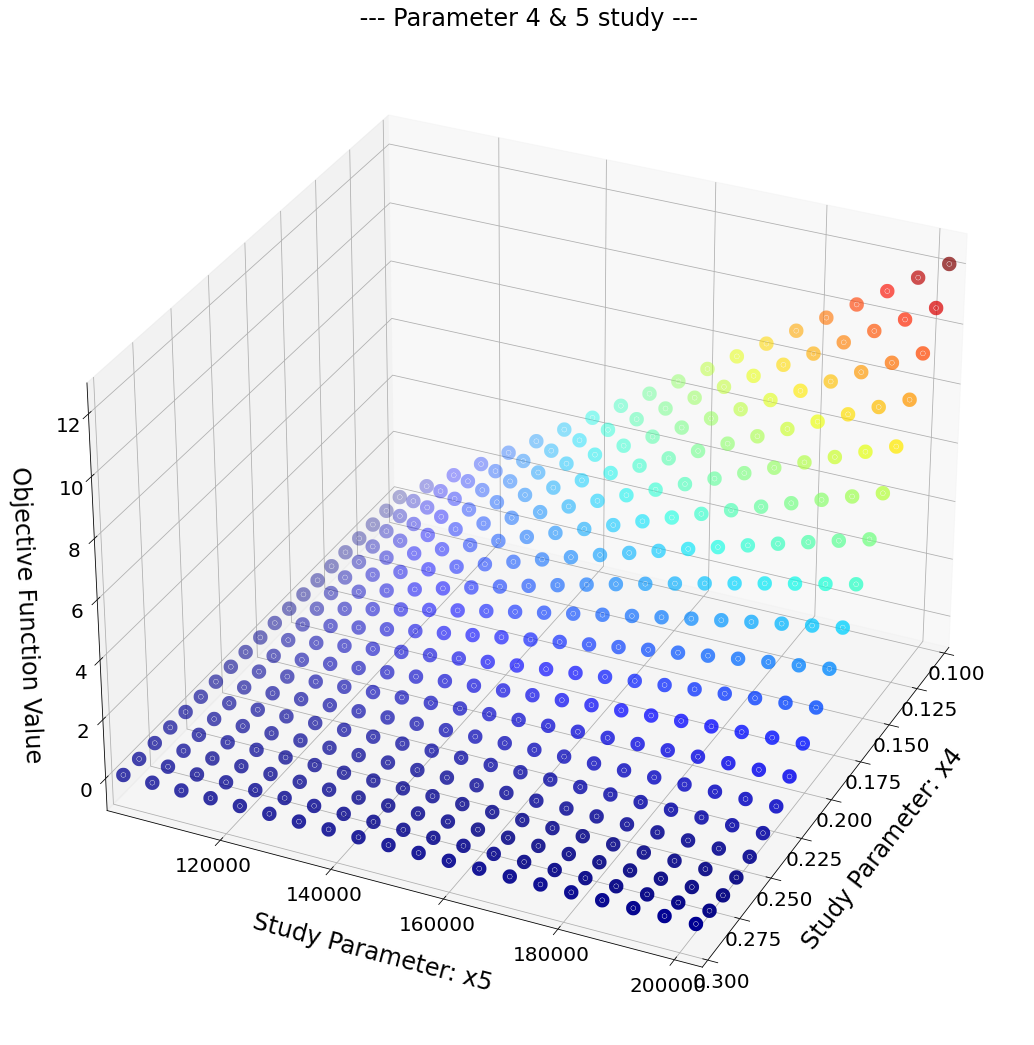

In [35]:
param_study2D(4,5,.1,.3,101325,101325*2,20,25)

<font size=6> This 2D design study shows that there is an exponential relationship for $x_{4}$ and the objective function value.</font><br><br>

This concludes the 2D design studies. 

Now, we want to define all design variables except two design variables. for the reduced problem study. This will leave us with an objective function that is 2D so and we can visualize the data. <br><br>
due to the results of the 2D study we chose to set all variables except $x_1$ the radius of the exit throat and $x_4$ the height of the midsection to constant values. We do this accordingly.

In [36]:
#a = a.subs(x1,x3)#104 cm radius
a = a.subs(x2,.095)#inner radius of rocket
a = a.subs(x3,.115)#outer radius of the rocket
#a = a.subs(x4,.175)#109 mm height
a = a.subs(x5,101325*2)#125 psi converted to pascals internal pressure, this value was chosen within an assumed range
a = a.subs(po,101325)#101325 pascal atmopsheric pressure
a = a.subs(rho,1240*.2)#1.24 Kg/m^3 with 20% infill density
a = a.subs(g,-9.81)#m/s^2 gravitational constant

Now the objective function becomes $a=${{a}}

In [39]:
delta = 0.003
x3max=.1
x3min=.095
x4max=.4
x4min=.1
x3 = np.arange(x3min-delta,x3max+delta, delta)
x4 = np.arange(x4min-delta,x4max+delta, delta)
X3,X4 = np.meshgrid(x3,x4)
a = a.subs(x3,X3)
a = a.subs(x4,X4)
fx = 9.81+((3475.18*pi*X3**2)/(pi*X4*(X3**2-.008836)+1.3333*pi*(X3**3-.000830584)))


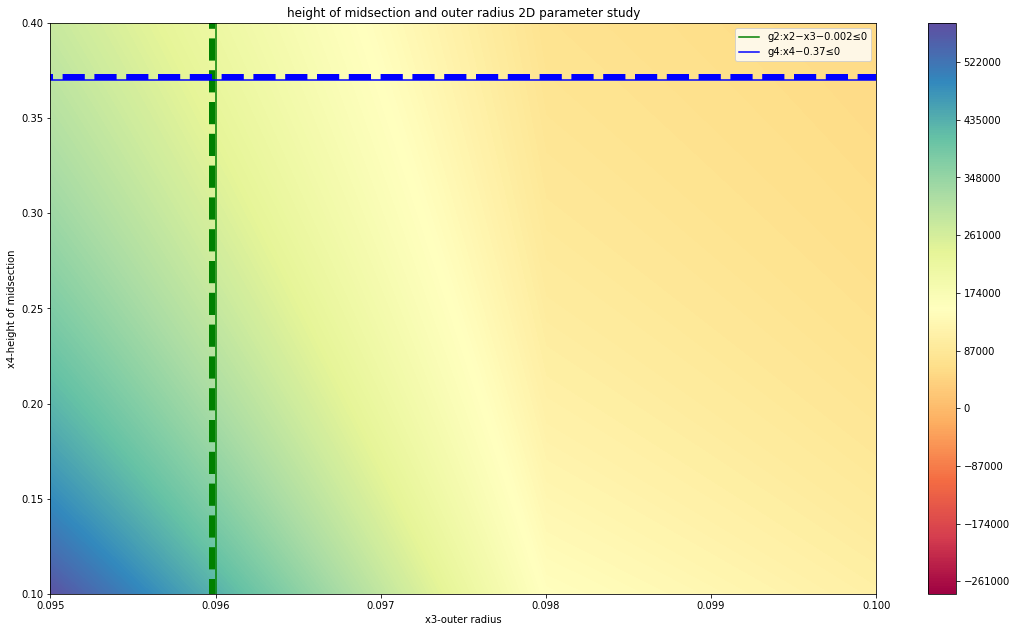

In [40]:
fig,ax=plt.subplots()
CS=ax.contourf(X3,X4,fx,1000,cmap='Spectral')
plt.xlim(x3min,x3max)
plt.ylim(x4min,x4max)
plt.xlabel('x3-outer radius')
plt.ylabel('x4-height of midsection')
plt.colorbar(CS)
fig.set_size_inches(18.5, 10.5)
x3 = np.arange(-1,2,delta)
x4 = np.arange(-1,2,delta)
x2 = .094
g4 = x3*0+x2+.002
g5 = x4*0+.37



g1p=plt.plot(g4*.9998,x3,color='green',linewidth=6,linestyle='--')
g2p=plt.plot(g4,x3,color='green',label='g2:x2−x3−0.002≤0')
g3p=plt.plot(x4,g5*1.005,color='blue',linewidth=6,linestyle='--')
g4p=plt.plot(x4,g5,color='blue',label='g4:x4−0.37≤0')
plt.title('height of midsection and outer radius 2D parameter study')

legend = plt.legend(loc=0)

In [41]:
V

In [42]:
math.pi


NameError: name 'math' is not defined